### Лабораторная работа № 2. 

### Антропов Артем Эдуардович 19-ИВТ-2
### Вариант 2
#### 1. Подсчитайте количество отменённых рейсов.
#### 2. Определите аэропорт, рейсы для которого отменяются наиболее часто.
#### 3. Определите коэффициент корреляции Пирсона и Спирмена между отменой рейса и днём недели, месяцем, авиакомпанией, аэропортом. Оцените значение p-value. Постройте плотность распределения признаков.
#### 4. Подсчитайте для трёх выбранных авиакомпаний: количество рейсов, количество отменённых рейсов, количество перенаправленных рейсов.
#### 5. Определите скорость полёта для каждого рейса, скорость полёта среднюю для трёх выбранных авиакомпаний.
#### 6. Визуализируйте тепловую карту частоты отмены рейсов. По одной оси – дни, по другой оси – рейс (для двух аэропортов).
#### 7. Посчитайте и визуализируйте время задержки отправки и прибытия по трём аэропортам.
#### 8. Определите для трёх выбранных аэропортов и визуализируйте задержки по каждой причине.
#### 9. Определите авиакомпанию с максимальными задержками рейсов по отправке и прибытию.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [121]:
flights_df = pd.read_csv('flights.csv')
df = flights_df
airline_df = flights_df
flights_df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2015,3,10,2,EV,4122,N11191,RDU,EWR,1013,...,1133.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048571,2015,3,10,2,UA,1018,N79279,LGA,IAH,1013,...,1335.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048572,2015,3,10,2,UA,1260,N76508,SAN,ORD,1013,...,1627.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048573,2015,3,10,2,EV,4349,N14158,MSY,ORD,1013,...,1229.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
flights_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
flights_df.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
1048570,2015,3,10,2,EV,4122,N11191,RDU,EWR,1013,...,1133.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048571,2015,3,10,2,UA,1018,N79279,LGA,IAH,1013,...,1335.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048572,2015,3,10,2,UA,1260,N76508,SAN,ORD,1013,...,1627.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048573,2015,3,10,2,EV,4349,N14158,MSY,ORD,1013,...,1229.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048574,2015,3,10,2,MQ,2916,N539MQ,CID,ORD,1013,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN


In [82]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 1048575 non-null  int64  
 1   MONTH                1048575 non-null  int64  
 2   DAY                  1048575 non-null  int64  
 3   DAY_OF_WEEK          1048575 non-null  int64  
 4   AIRLINE              1048575 non-null  object 
 5   FLIGHT_NUMBER        1048575 non-null  int64  
 6   TAIL_NUMBER          1040825 non-null  object 
 7   ORIGIN_AIRPORT       1048575 non-null  object 
 8   DESTINATION_AIRPORT  1048575 non-null  object 
 9   SCHEDULED_DEPARTURE  1048575 non-null  int64  
 10  DEPARTURE_TIME       1009060 non-null  float64
 11  DEPARTURE_DELAY      1009060 non-null  float64
 12  TAXI_OUT             1008346 non-null  float64
 13  WHEELS_OFF           1008346 non-null  float64
 14  SCHEDULED_TIME       1048573 non-null  float64
 15

In [83]:
flights_df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.009060e+06,1.009060e+06,1.008346e+06,1.008346e+06,...,1.048575e+06,1.007279e+06,1.005504e+06,1.048575e+06,1.048575e+06,228528.000000,228528.000000,228528.000000,228528.000000,228528.000000
mean,2015.0,1.694297e+00,1.382097e+01,3.953196e+00,2.256759e+03,1.322632e+03,1.333705e+03,1.133485e+01,1.665380e+01,1.357382e+03,...,1.504820e+03,1.492204e+03,7.612191e+00,2.426150e-03,3.864960e-02,13.692554,0.057328,18.203577,22.921458,3.545277
std,0.0,7.051508e-01,8.725656e+00,1.999436e+00,1.799166e+03,4.707748e+02,4.827415e+02,3.922372e+01,1.007006e+01,4.830351e+02,...,4.865613e+02,5.071090e+02,4.209367e+01,4.919620e-02,1.927585e-01,25.524897,1.779647,46.323146,41.888498,23.611555
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-6.100000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.200000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,1.000000e+00,6.000000e+00,2.000000e+00,7.550000e+02,9.200000e+02,9.280000e+02,-5.000000e+00,1.100000e+01,9.440000e+02,...,1.120000e+03,1.115000e+03,-1.200000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,2.000000e+00,1.300000e+01,4.000000e+00,1.725000e+03,1.319000e+03,1.329000e+03,-1.000000e+00,1.400000e+01,1.342000e+03,...,1.524000e+03,1.521000e+03,-3.000000e+00,0.000000e+00,0.000000e+00,4.000000,0.000000,2.000000,4.000000,0.000000
75%,2015.0,2.000000e+00,2.100000e+01,6.000000e+00,3.485000e+03,1.720000e+03,1.731000e+03,1.100000e+01,1.900000e+01,1.745000e+03,...,1.915000e+03,1.917000e+03,1.200000e+01,0.000000e+00,0.000000e+00,19.000000,0.000000,18.000000,29.000000,0.000000
max,2015.0,3.000000e+00,3.100000e+01,7.000000e+00,9.794000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.359000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,830.000000,241.000000,1971.000000,1313.000000,1152.000000


In [84]:
flights_df.dropna()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY


In [85]:
flights_df.drop_duplicates()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2015,3,10,2,EV,4122,N11191,RDU,EWR,1013,...,1133.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048571,2015,3,10,2,UA,1018,N79279,LGA,IAH,1013,...,1335.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048572,2015,3,10,2,UA,1260,N76508,SAN,ORD,1013,...,1627.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048573,2015,3,10,2,EV,4349,N14158,MSY,ORD,1013,...,1229.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
flights_df.shape

(1048575, 31)

## 1. Подсчитайте количество отменённых рейсов.

In [87]:
flights_df[flights_df['CANCELLED'] == 1]['CANCELLED'].count()

40527

## 2. Определите аэропорт, рейсы для которого отменяются наиболее часто.

In [88]:
cancelled_df = pd.DataFrame(flights_df.groupby(['ORIGIN_AIRPORT'])['CANCELLED'].sum())

In [89]:
cancelled_df.sort_values(by=['CANCELLED'], ascending = False).head(1)

,CANCELLED
ORIGIN_AIRPORT,
DFW,3578


## 3. Определите коэффициент корреляции Пирсона и Спирмена между отменой рейса и днём недели, месяцем, авиакомпанией, аэропортом. Оцените значение p-value. Постройте плотность распределения признаков.

In [90]:
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [91]:
a = flights_df['CANCELLED']
b = flights_df['DAY_OF_WEEK']
stats.pearsonr(a, b)
#Коэффициент корреляции Пирсона измеряет линейную связь между двумя наборами данных. 
#Расчет p-значения основан на предположении, что каждый набор данных распределен нормально.
#Значение p примерно указывает на вероятность того, что некоррелированная система произведет наборы данных, которые имеют 
#корреляцию Пирсона, по крайней мере, столь же экстремальную, как корреляция, вычисленная на основе этих наборов данных.

(-0.034068711647744575, 8.421162978809802e-267)

In [92]:
stats.spearmanr(flights_df['CANCELLED'], flights_df['DAY_OF_WEEK'])
#В отличие от корреляции Пирсона, корреляция Спирмена не предполагает, что оба набора данных имеют нормальное распределение.
#Значение p примерно указывает на вероятность того, что некоррелированная система произведет наборы данных, которые имеют 
#корреляцию Спирмена, по крайней мере, столь же экстремальную, как корреляция, вычисленная из этих наборов данных.

SpearmanrResult(correlation=-0.034673218497205664, pvalue=2.784239888470112e-276)

#### отменой рейса и месяцем

In [93]:
a = flights_df['CANCELLED']
b = flights_df['MONTH']
stats.pearsonr(a, b)

(0.059183552923896376, 0.0)

In [94]:
stats.spearmanr(flights_df['CANCELLED'], flights_df['MONTH'])

SpearmanrResult(correlation=0.061244820697519985, pvalue=0.0)

#### отменой рейса и авиакомпанией

In [95]:
label_encoder = LabelEncoder()

label_encoder.fit(flights_df.AIRLINE)
flights_df['AIRLINE']=label_encoder.transform(flights_df.AIRLINE)

a = flights_df['CANCELLED']
b = flights_df['AIRLINE']
stats.pearsonr(a, b)

(-0.016338025044725698, 7.762345019437045e-63)

In [96]:
stats.spearmanr(flights_df['CANCELLED'], flights_df['AIRLINE'])

SpearmanrResult(correlation=-0.0159794188752134, pvalue=3.4598665200039363e-60)

#### отменой рейса и Аэропортом

In [97]:
flights_df['ORIGIN_AIRPORT'] = flights_df['ORIGIN_AIRPORT'].astype(str)

In [98]:
label_encoder2 = LabelEncoder()

label_encoder2.fit(flights_df.ORIGIN_AIRPORT)
flights_df['ORIGIN_AIRPORT']=label_encoder2.transform(flights_df['ORIGIN_AIRPORT'])

a = flights_df['CANCELLED']
b = flights_df['ORIGIN_AIRPORT']
stats.pearsonr(a, b)

(-0.02812330868467366, 1.9158712866916684e-182)

In [99]:
flights_df['ORIGIN_AIRPORT'] = flights_df['ORIGIN_AIRPORT'].astype(str)
stats.spearmanr(flights_df['CANCELLED'], flights_df['ORIGIN_AIRPORT'])

SpearmanrResult(correlation=0.014499937559450502, pvalue=7.093949083185112e-50)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

<AxesSubplot:xlabel='CANCELLED'>

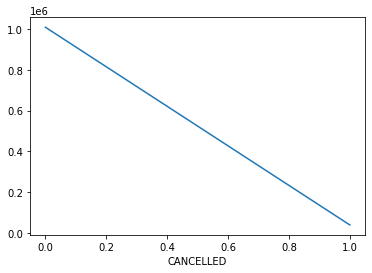

In [100]:
flights_df.groupby(['CANCELLED'])['CANCELLED'].count().plot()

<AxesSubplot:xlabel='DAY_OF_WEEK'>

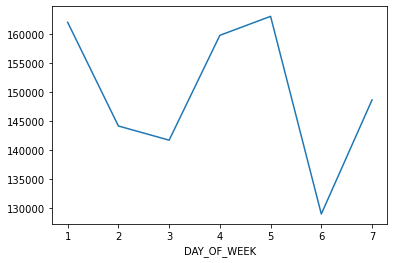

In [101]:
flights_df.groupby(['DAY_OF_WEEK'])['CANCELLED'].count().plot()

<AxesSubplot:xlabel='MONTH'>

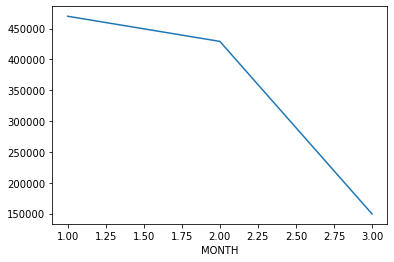

In [102]:
flights_df.groupby(['MONTH'])['MONTH'].count().plot()

<AxesSubplot:xlabel='AIRLINE'>

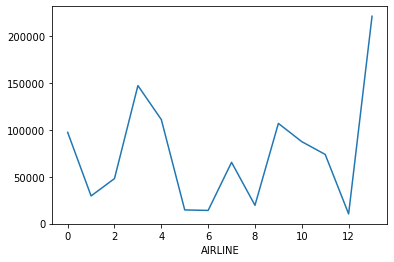

In [103]:
flights_df.groupby(['AIRLINE'])['AIRLINE'].count().plot()

<AxesSubplot:xlabel='ORIGIN_AIRPORT'>

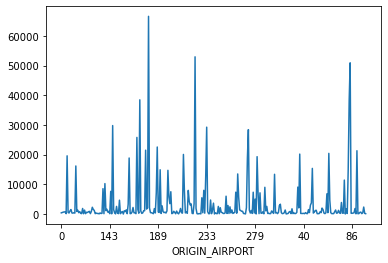

In [104]:
flights_df.groupby(['ORIGIN_AIRPORT'])['ORIGIN_AIRPORT'].count().plot()

### 4. Подсчитайте для трёх выбранных авиакомпаний: количество рейсов, количество отменённых рейсов, количество перенаправленных рейсов.

In [131]:
flights_df[flights_df['AIRLINE'] == "DL"]['CANCELLED'].count()

147486

In [132]:
flights_df[flights_df['AIRLINE'] == "DL"]['CANCELLED'].sum()

2861

In [133]:
flights_df[flights_df['AIRLINE'] == "DL"]['DIVERTED'].sum()

255

In [134]:
flights_df[flights_df['AIRLINE'] == "AA"]['CANCELLED'].count()

97549

In [135]:
flights_df[flights_df['AIRLINE'] == "AA"]['CANCELLED'].sum()

4685

In [136]:
flights_df[flights_df['AIRLINE'] == "AA"]['DIVERTED'].sum()

230

In [137]:
flights_df[flights_df['AIRLINE'] == "OO"]['CANCELLED'].count()

107099

In [138]:
flights_df[flights_df['AIRLINE'] == "OO"]['CANCELLED'].sum()

2983

In [139]:
flights_df[flights_df['AIRLINE'] == "OO"]['DIVERTED'].sum()

378

### 5. Определите скорость полёта для каждого рейса, скорость полёта среднюю для трёх выбранных авиакомпаний.

In [143]:
flights_df['SPEED'] = flights_df['DISTANCE']/(flights_df['AIR_TIME']/60)
flights_df['SPEED']

0          514.082840
1          531.558935
2          517.894737
3          544.651163
4          436.582915
              ...    
1048570    390.000000
1048571    387.945205
1048572    469.909091
1048573    395.433071
1048574           NaN
Name: SPEED, Length: 1048575, dtype: float64

In [144]:
A = flights_df[flights_df['AIRLINE'] == "OO"]['SPEED'].count()
B = flights_df[flights_df['AIRLINE'] == "OO"]['SPEED'].sum()
print(B/A)

359.7236985378757


In [145]:
A = flights_df[flights_df['AIRLINE'] == "AA"]['SPEED'].count()
B = flights_df[flights_df['AIRLINE'] == "AA"]['SPEED'].sum()
print(B/A)

431.1760555940942


In [146]:
A = flights_df[flights_df['AIRLINE'] == "DL"]['SPEED'].count()
B = flights_df[flights_df['AIRLINE'] == "DL"]['SPEED'].sum()
print(B/A)

416.62848412320284


### 6. Визуализируйте тепловую карту частоты отмены рейсов. По одной оси – дни, по другой оси – рейс (для двух аэропортов).

In [153]:
ASD1 = flights_df[flights_df['ORIGIN_AIRPORT'] == 'CID']
ASD1

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,SPEED
154,2015,1,1,4,EV,5230,N181PQ,CID,ATL,554,...,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,495.714286
312,2015,1,1,4,MQ,3189,N532MQ,CID,DFW,600,...,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN,NaN
355,2015,1,1,4,OO,6378,N767SK,CID,ORD,600,...,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,273.488372
946,2015,1,1,4,EV,5423,N724EV,CID,MSP,700,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,314.285714
1289,2015,1,1,4,MQ,3197,N523MQ,CID,DFW,730,...,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,387.735849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044186,2015,3,10,2,EV,5230,N724EV,CID,ATL,600,...,69.0,0,0,NaN,69.0,0.0,0.0,0.0,0.0,447.741935
1044943,2015,3,10,2,MQ,3276,N521MQ,CID,ORD,643,...,317.0,0,0,NaN,0.0,0.0,0.0,0.0,317.0,267.272727
1046773,2015,3,10,2,MQ,3116,N678MQ,CID,ORD,827,...,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN,NaN
1047684,2015,3,10,2,OO,6477,N750SK,CID,DEN,915,...,258.0,0,0,NaN,0.0,0.0,0.0,258.0,0.0,428.041237


In [154]:
asdf1 = ASD1[['DAY', 'CANCELLED']].set_index('DAY')
asdf1

,CANCELLED
DAY,
1,0
1,1
1,0
1,0
1,0
...,...
10,0
10,0
10,1


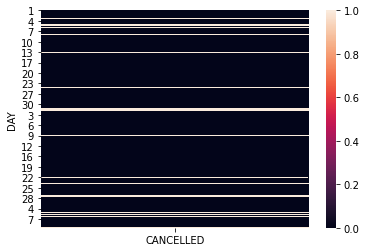

In [155]:
asd1 = sns.heatmap(asdf1)

In [159]:
ASD2 = flights_df[flights_df['ORIGIN_AIRPORT'] == 'EWR']
ASD2

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,SPEED
170,2015,1,1,4,AA,1205,N3FKAA,EWR,MIA,559,...,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,436.912752
176,2015,1,1,4,UA,319,N498UA,EWR,MCO,600,...,-18.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,416.444444
244,2015,1,1,4,B6,605,N766JB,EWR,FLL,600,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,440.689655
365,2015,1,1,4,UA,1689,N39461,EWR,SFO,601,...,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,433.521127
417,2015,1,1,4,UA,1601,N37466,EWR,FLL,606,...,-37.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,446.853147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048327,2015,3,10,2,UA,1110,N75425,EWR,LAS,1000,...,-24.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,439.539474
1048328,2015,3,10,2,UA,1170,N78509,EWR,FLL,1000,...,40.0,0,0,NaN,0.0,0.0,40.0,0.0,0.0,426.000000
1048329,2015,3,10,2,UA,1248,N24702,EWR,BOS,1000,...,-18.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,307.692308
1048458,2015,3,10,2,EV,4364,N11187,EWR,MCI,1005,...,34.0,0,0,NaN,34.0,0.0,0.0,0.0,0.0,394.698795


In [160]:
asdf2 = ASD2[['DAY', 'CANCELLED']].set_index('DAY')
asdf2

,CANCELLED
DAY,
1,0
1,0
1,0
1,0
1,0
...,...
10,0
10,0
10,0


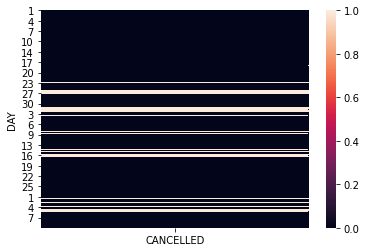

In [161]:
asd2 = sns.heatmap(asdf2)

### 7. Визуализируйте время задержки отправки и прибытия по трём аэропортам.

<AxesSubplot:>

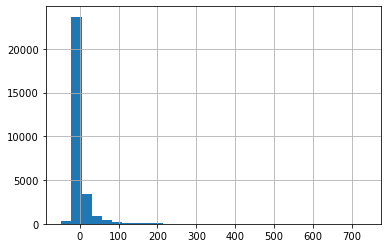

In [162]:
df[df['AIRLINE'] == "AS"]['DEPARTURE_DELAY'].hist(bins=30)

<AxesSubplot:>

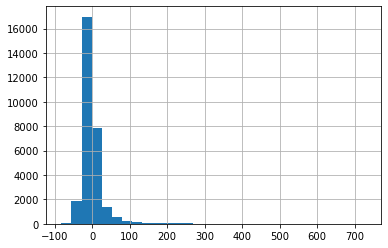

In [163]:
df[df['AIRLINE'] == "AS"]['ARRIVAL_DELAY'].hist(bins=30)

<AxesSubplot:>

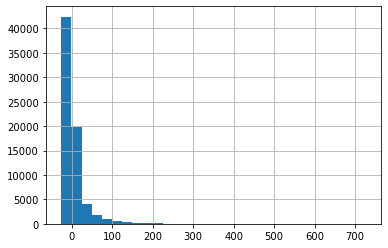

In [164]:
df[df['AIRLINE'] == "US"]['DEPARTURE_DELAY'].hist(bins=30)

<AxesSubplot:>

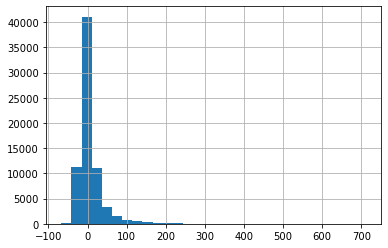

In [165]:
df[df['AIRLINE'] == "US"]['ARRIVAL_DELAY'].hist(bins=30)

<AxesSubplot:>

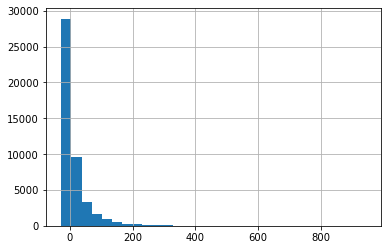

In [166]:
df[df['AIRLINE'] == "B6"]['DEPARTURE_DELAY'].hist(bins=30)

<AxesSubplot:>

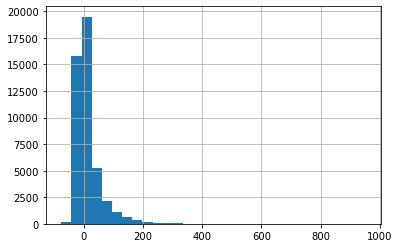

In [167]:
df[df['AIRLINE'] == "B6"]['ARRIVAL_DELAY'].hist(bins=30)

### 8. Для трёх выбранных аэропортов визуализируйте задержки по каждой причине.

<AxesSubplot:>

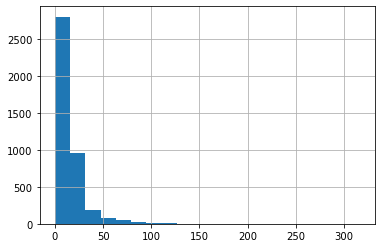

In [168]:
df[df['AIRLINE'] == "AS"]['AIR_SYSTEM_DELAY'].hist(bins=20)

<AxesSubplot:>

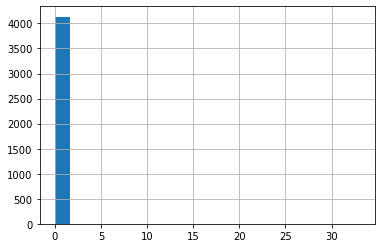

In [169]:
df[df['AIRLINE'] == "AS"]['SECURITY_DELAY'].hist(bins=20)

<AxesSubplot:>

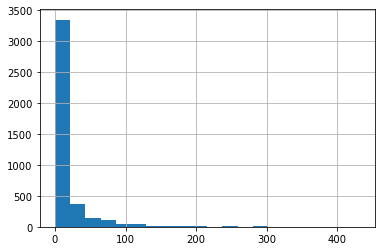

In [170]:
df[df['AIRLINE'] == "AS"]['AIRLINE_DELAY'].hist(bins=20)

<AxesSubplot:>

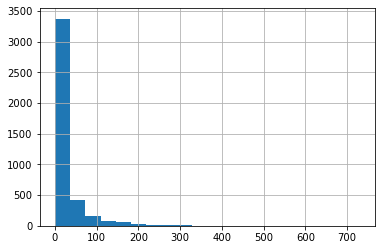

In [171]:
df[df['AIRLINE'] == "AS"]['LATE_AIRCRAFT_DELAY'].hist(bins=20)

<AxesSubplot:>

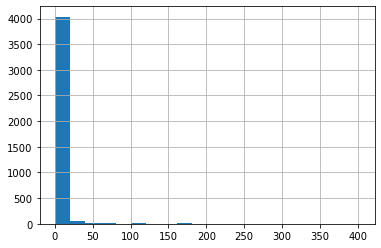

In [172]:
df[df['AIRLINE'] == "AS"]['WEATHER_DELAY'].hist(bins=20)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

<AxesSubplot:>

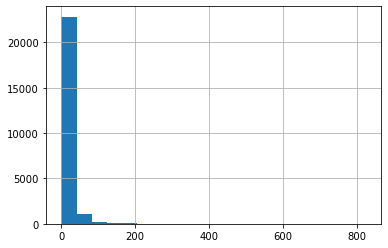

In [173]:
df[df['AIRLINE'] == "OO"]['AIR_SYSTEM_DELAY'].hist(bins=20)

<AxesSubplot:>

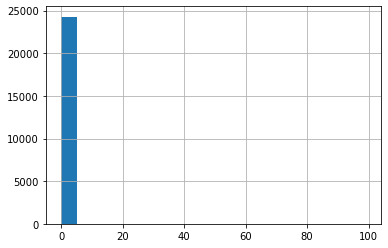

In [174]:
df[df['AIRLINE'] == "OO"]['SECURITY_DELAY'].hist(bins=20)

<AxesSubplot:>

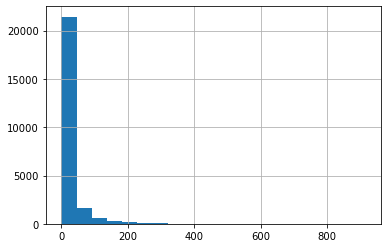

In [175]:
df[df['AIRLINE'] == "OO"]['AIRLINE_DELAY'].hist(bins=20)

<AxesSubplot:>

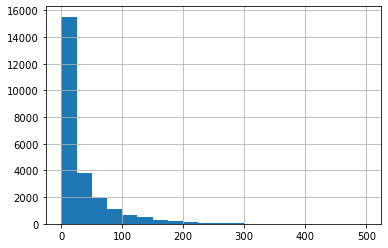

In [176]:
df[df['AIRLINE'] == "OO"]['LATE_AIRCRAFT_DELAY'].hist(bins=20)

<AxesSubplot:>

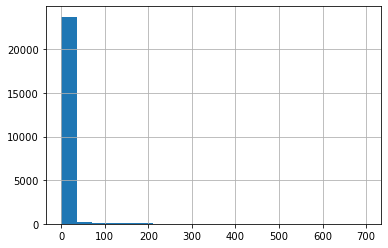

In [177]:
df[df['AIRLINE'] == "OO"]['WEATHER_DELAY'].hist(bins=20)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

<AxesSubplot:>

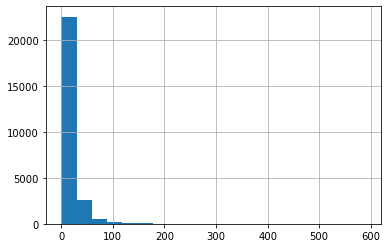

In [178]:
df[df['AIRLINE'] == "EV"]['AIR_SYSTEM_DELAY'].hist(bins=20)

<AxesSubplot:>

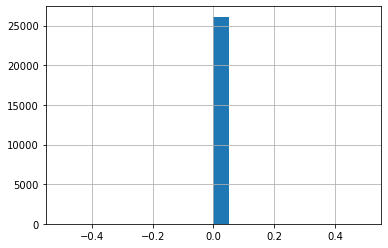

In [179]:
df[df['AIRLINE'] == "EV"]['SECURITY_DELAY'].hist(bins=20)

<AxesSubplot:>

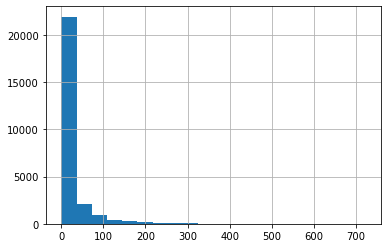

In [180]:
df[df['AIRLINE'] == "EV"]['AIRLINE_DELAY'].hist(bins=20)

<AxesSubplot:>

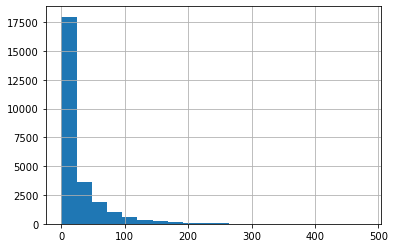

In [181]:
df[df['AIRLINE'] == "EV"]['LATE_AIRCRAFT_DELAY'].hist(bins=20)

<AxesSubplot:>

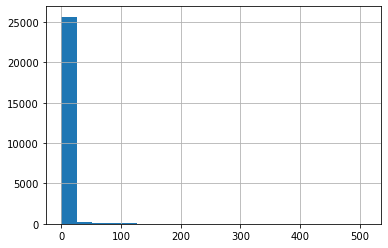

In [182]:
df[df['AIRLINE'] == "EV"]['WEATHER_DELAY'].hist(bins=20)

### 9. Определите авиакомпанию с максимальными задержками рейсов по отправке и прибытию.

In [183]:
df.sort_values(by=['ARRIVAL_DELAY'], ascending = False).head(1)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,SPEED
337720,2015,1,23,5,AA,1322,N598AA,BHM,DFW,700,...,1971.0,0,0,NaN,0.0,0.0,1971.0,0.0,0.0,361.818182


In [184]:
df.sort_values(by=['DEPARTURE_DELAY'], ascending = False).head(1)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,SPEED
337720,2015,1,23,5,AA,1322,N598AA,BHM,DFW,700,...,1971.0,0,0,NaN,0.0,0.0,1971.0,0.0,0.0,361.818182
